In [1]:
# Data manipulation
# ==============================================================================
from fenics import *

# Graphics
# ==============================================================================
import matplotlib.pyplot as plt

# Autoreload extension
# ==============================================================================
# %reload_ext autoreload    
# %autoreload 2

In [2]:
# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

In [4]:
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

In [6]:
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [9]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

In [10]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


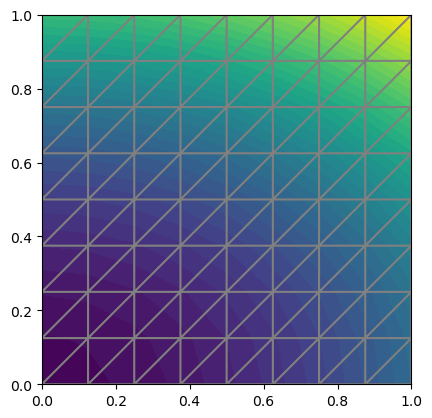

In [22]:
# Plot solution and mesh
plot(u)
plot(mesh)

# Hold plot
plt.show()

In [12]:
# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

In [13]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

Calling FFC just-in-time (JIT) compiler, this may take some time.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [14]:
# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

In [15]:
# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

error_L2  = 0.008235098073354827
error_max = 1.3322676295501878e-15
